<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-типов-данных" data-toc-modified-id="Замена-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена типов данных</a></span></li><li><span><a href="#Подготовка-пользовательских-данных" data-toc-modified-id="Подготовка-пользовательских-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовка пользовательских данных</a></span></li></ul></li><li><span><a href="#Анализ-и-описание-данных" data-toc-modified-id="Анализ-и-описание-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ и описание данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла 

In [1]:
import pandas as pd 
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

server_path_calls = '/datasets/calls.csv'
server_path_internet = '/datasets/internet.csv'
server_path_messages = '/datasets/messages.csv'
server_path_tariffs = '/datasets/tariffs.csv'
server_path_users = '/datasets/users.csv'

filename_calls = 'calls.csv'
filename_internet = 'internet.csv'
filename_messages = 'messages.csv'
filename_tariffs = 'tariffs.csv'
filename_users = 'users.csv'

try: 
    calls = pd.read_csv(filename_calls, sep=',')
    internet = pd.read_csv(filename_internet, sep=',')
    messages = pd.read_csv(filename_messages, sep=',')
    tariffs = pd.read_csv(filename_tariffs, sep=',')
    users = pd.read_csv(filename_users, sep=',')
except: 
    calls = pd.read_csv(server_path_calls, sep=',')
    internet = pd.read_csv(server_path_internet, sep=',')
    messages = pd.read_csv(server_path_messages, sep=',')
    tariffs = pd.read_csv(server_path_tariffs, sep=',')
    users = pd.read_csv(server_path_users, sep=',')

In [2]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [9]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


## Подготовка данных 

Отдельно по каждой таблице посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам, а также помесячную выручку с каждого пользователя. 

### Замена типов данных 

Для начала в каждой из таблиц необходимо заменить тип данных в столбцах с информацией, содержащей дату, методом *to_datetime* и проверить, есть ли ошибки в данных. 

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')

In [13]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [14]:
len(calls['user_id'].unique())

492

In [15]:
calls.duplicated().sum()

0

В таблице со звонками не наблюдается аномалий. Дубликатов и пропусков нет. 

Количество пользователей составляет 492 вместо 500. Это вероятно объясняется тем, что не все пользователи используют звонки в рамках тарифов (пользуются, например, мессенджерами) или это автоматическая ошибка заполнения. 

Максимальная длительность звонка в данных 38 минут, что больше среднего почти в 6 раз, но логически допустимо и важно для статистики. Ноль в строках о длительности звонка говорит о том, что звонок пропущен. 

В таблице дана фактическая длительность звонков пользователей. Мобильный оператор округляет секунды до минут, каждый звонок отдельно. Округлим длительность звонков до минут в данной таблице для дальнейших расчетов. 

In [16]:
calls['duration'].sum()

1368790.0399999998

In [17]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
calls['duration'].sum()

1450301

In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

В таблице присутствуют значения с нулевым трафиком. Поскольку данные приведены о каждой конкретной интернет-сессии, то нулевые значения можно объяснить, например, тем, что пользователь заходил в интернет с вай-фай, параллельно используя мобильные данные, что ошибочно отразилось в статистике. Правильным будет от них избавиться, потому что ноль здесь, вероятнее всего, указывает на ошибку. 

In [19]:
internet['mb_used'].value_counts().head()

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
Name: mb_used, dtype: int64

In [20]:
internet.drop(internet[internet['mb_used'] == 0].index, inplace=True)

In [21]:
internet['mb_used'].describe()

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

In [22]:
len(internet['user_id'].unique())

497

In [23]:
internet.duplicated().sum()

0

В среднем пользователь за интернет-сессию использует 420 мб. Максимальное значение по выборке 1724 мб (1,6 гб или скачать кино, когда рутрекер еще работал). Пользователей, пользующихся интернетом 497. Дубликатов также нет.   

В таблице "интернет" присутствует странный столбец 'Unnamed: 0', повторяющий индексы. Избавимся от него за ненадобностью. 

In [24]:
internet = internet.drop(['Unnamed: 0'], axis=1)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [25]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')

In [26]:
len(messages['user_id'].unique())

426

In [27]:
messages.duplicated().sum()

0

В данных по сообщениям нет количественых переменных, по которым можно было бы оценить статистические характеристики. Пропусков и дубликатов нет. Пользователей 426 из 500.

In [28]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%dT%H:%M:%S')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')

In [29]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [30]:
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Пропуски в данных о дате прекращения пользования тарифом указывают на то, что тариф все еще действителен. Оставим их нетронутыми. В остальном, ошибок, дубликатов или аномалий не наблюдается. 

Таблица с тарифами содержит всего две строки с описанием условий и представлена выше. Типы данных корректны, пропусков нет. Объем трафика дан в мб, переведем в гб. 

In [31]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


### Подготовка пользовательских данных 

**Звонки**

Необходимо посчитать количество звонков и израсходованных минут для каждого пользователя по месяцам. Добавим столбец с месяцем каждой операции. 

In [32]:
calls['month'] = calls['call_date'].dt.month
calls.head(1)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7


In [33]:
calls_count = calls.pivot_table(index=('user_id', 'month'), values=(
    'id', 'duration'), aggfunc={'id':'count', 'duration':'sum'}).reset_index()
calls_count.head()

,user_id,month,duration,id
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


Переименуем столбцы *id* в *calls* для того, чтобы в сводной таблице не потерять количество сообщений и звонков. 

In [34]:
calls_count.columns = ['user_id', 'month', 'duration', 'calls']
calls_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   3174 non-null   int64
 1   month     3174 non-null   int64
 2   duration  3174 non-null   int32
 3   calls     3174 non-null   int64
dtypes: int32(1), int64(3)
memory usage: 86.9 KB


**Сообщения**

Аналогично посчитаем количество отправленных сообщений по месяцам для каждого пользователя. 

In [35]:
messages['month'] = messages['message_date'].dt.month
messages.head(1)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6


In [36]:
messages_count = messages.pivot_table(index=('user_id', 'month'), values='id', aggfunc='count').reset_index()
messages_count.head()

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [37]:
messages_count.columns = ['user_id', 'month', 'messages']
messages_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   2717 non-null   int64
 1   month     2717 non-null   int64
 2   messages  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


**Интернет-трафик** 

Мобильный оператор не округляет мб, использованные в разовые интернет-сессии, но делает это, высчитывая общую сумму использования веб-трафика в месяц. Поэтому полученные результаты округлим в большую сторону до гб. 

In [38]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [39]:
internet_count = internet.pivot_table(index=('user_id', 'month'), values='mb_used', aggfunc='sum').reset_index()

In [40]:
internet_count['gb_used'] = (internet_count['mb_used'] / 1024).apply(np.ceil)
internet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3201 non-null   int64  
 1   month    3201 non-null   int64  
 2   mb_used  3201 non-null   float64
 3   gb_used  3201 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 100.2 KB


**Месячная выручка с пользователей**

In [41]:
users_calls = users.merge(calls_count, on='user_id', how='outer')
users_calls.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,calls
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,43.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,47.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,52.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,58.0
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,350.0,57.0
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,338.0,43.0
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,333.0,46.0
8,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11.0,430.0,59.0
9,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,12.0,414.0,63.0


In [42]:
users_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     3182 non-null   int64         
 1   age         3182 non-null   int64         
 2   churn_date  189 non-null    datetime64[ns]
 3   city        3182 non-null   object        
 4   first_name  3182 non-null   object        
 5   last_name   3182 non-null   object        
 6   reg_date    3182 non-null   datetime64[ns]
 7   tariff      3182 non-null   object        
 8   month       3174 non-null   float64       
 9   duration    3174 non-null   float64       
 10  calls       3174 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 298.3+ KB


In [43]:
users_calls.loc[users_calls['month'].isnull()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,calls
570,1091,36,NaT,Набережные Челны,Вера,Суслова,2018-05-08,ultra,NaN,NaN,NaN
664,1106,67,NaT,Калуга,Исаак,Костин,2018-04-26,ultra,NaN,NaN,NaN
812,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,NaN,NaN,NaN
1460,1231,63,NaT,Чебоксары,Касьян,Авдюков,2018-05-23,ultra,NaN,NaN,NaN
2061,1328,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra,NaN,NaN,NaN
2311,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,NaN,NaN,NaN
3022,1473,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra,NaN,NaN,NaN
3121,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,NaN,NaN,NaN


Некоторые пользователи не пользовались одной из предложенных функций в тарифе (например, звонками), поэтому при составлении сводных таблиц по месяцам/функциям, значения месяца просчитаны как NaN. Заменим пропуски на рандомный 12-й месяц, чтобы в дальнейшем эти строки не потерялись. 

In [44]:
users_calls['month'] = users_calls['month'].fillna(12)

In [45]:
users_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     3182 non-null   int64         
 1   age         3182 non-null   int64         
 2   churn_date  189 non-null    datetime64[ns]
 3   city        3182 non-null   object        
 4   first_name  3182 non-null   object        
 5   last_name   3182 non-null   object        
 6   reg_date    3182 non-null   datetime64[ns]
 7   tariff      3182 non-null   object        
 8   month       3182 non-null   float64       
 9   duration    3174 non-null   float64       
 10  calls       3174 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 298.3+ KB


In [46]:
users_messages = users.merge(messages_count, on=('user_id'), how='outer')
users_messages.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,messages
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,60.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,75.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,81.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,57.0
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,73.0
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,58.0
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,70.0
8,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN
9,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6.0,4.0


In [47]:
users_messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2791 entries, 0 to 2790
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2791 non-null   int64         
 1   age         2791 non-null   int64         
 2   churn_date  149 non-null    datetime64[ns]
 3   city        2791 non-null   object        
 4   first_name  2791 non-null   object        
 5   last_name   2791 non-null   object        
 6   reg_date    2791 non-null   datetime64[ns]
 7   tariff      2791 non-null   object        
 8   month       2717 non-null   float64       
 9   messages    2717 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 239.9+ KB


In [48]:
users_messages.loc[users_messages['month'].isnull()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,messages
8,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN
41,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,NaN,NaN
62,1010,26,NaT,Тюмень,Эдуард,Кононов,2018-08-05,smart,NaN,NaN
104,1017,73,NaT,Краснодар,Мария,Аленникова,2018-05-22,smart,NaN,NaN
136,1024,73,NaT,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2568,1462,72,NaT,Тольятти,Алёна,Абрамычева,2018-10-29,smart,NaN,NaN
2591,1466,37,NaT,Новосибирск,Рубен,Шевцов,2018-02-28,ultra,NaN,NaN
2605,1469,41,NaT,Сочи,Аксён,Абалкин,2018-07-06,ultra,NaN,NaN
2674,1479,40,NaT,Хабаровск,Игорь,Богданов,2018-07-03,smart,NaN,NaN


In [49]:
users_messages['month'] = users_messages['month'].fillna(12)

In [50]:
users_messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2791 entries, 0 to 2790
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2791 non-null   int64         
 1   age         2791 non-null   int64         
 2   churn_date  149 non-null    datetime64[ns]
 3   city        2791 non-null   object        
 4   first_name  2791 non-null   object        
 5   last_name   2791 non-null   object        
 6   reg_date    2791 non-null   datetime64[ns]
 7   tariff      2791 non-null   object        
 8   month       2791 non-null   float64       
 9   messages    2717 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 239.9+ KB


In [51]:
users_internet = users.merge(internet_count, on=('user_id'), how='outer')
users_internet.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,mb_used,gb_used
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,2253.49,3.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,23233.77,23.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,14003.64,14.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,14055.93,14.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,14568.91,15.0
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,14702.49,15.0
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,14756.47,15.0
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,9817.61,10.0
8,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11.0,18429.34,18.0
9,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,12.0,14036.66,14.0


In [52]:
users_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3204 entries, 0 to 3203
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     3204 non-null   int64         
 1   age         3204 non-null   int64         
 2   churn_date  188 non-null    datetime64[ns]
 3   city        3204 non-null   object        
 4   first_name  3204 non-null   object        
 5   last_name   3204 non-null   object        
 6   reg_date    3204 non-null   datetime64[ns]
 7   tariff      3204 non-null   object        
 8   month       3201 non-null   float64       
 9   mb_used     3201 non-null   float64       
 10  gb_used     3201 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 300.4+ KB


In [53]:
users_internet.loc[users_internet['month'].isnull()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,mb_used,gb_used
826,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,NaN,NaN,NaN
1722,1273,46,NaT,Курган,Рэм,Корнилов,2018-05-15,ultra,NaN,NaN,NaN
2326,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,NaN,NaN,NaN


In [54]:
users_internet['month'] = users_internet['month'].fillna(12)

In [55]:
users_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3204 entries, 0 to 3203
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     3204 non-null   int64         
 1   age         3204 non-null   int64         
 2   churn_date  188 non-null    datetime64[ns]
 3   city        3204 non-null   object        
 4   first_name  3204 non-null   object        
 5   last_name   3204 non-null   object        
 6   reg_date    3204 non-null   datetime64[ns]
 7   tariff      3204 non-null   object        
 8   month       3204 non-null   float64       
 9   mb_used     3201 non-null   float64       
 10  gb_used     3201 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 300.4+ KB


Создадим таблицу со звонками, сообщениями и трафиком. Делаем это по отдельности методом *merge*, поскольку, применяя *join*, мы теряем часть данных, индексы которых не совпадают. Чтобы количество столбцов не удваивалось, в *on* записываем все повторяющиеся столбцы двух таблиц. 

In [56]:
users_calls_messages = users_calls.merge(users_messages, on=(
    'user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff', 'month'), how='outer')
users_calls_messages.tail()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,calls,messages
3214,1473,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra,11.0,NaN,NaN,14.0
3215,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,8.0,NaN,NaN,17.0
3216,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,9.0,NaN,NaN,32.0
3217,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,10.0,NaN,NaN,21.0
3218,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,11.0,NaN,NaN,20.0


In [57]:
users_calls_messages_internet = users_calls_messages.merge(users_internet, on=(
    'user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff', 'month'), how='outer')
users_calls_messages_internet.tail(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,calls,messages,mb_used,gb_used
3217,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,10.0,NaN,NaN,21.0,19559.44,20.0
3218,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,11.0,NaN,NaN,20.0,17491.56,18.0
3219,1476,50,NaT,Москва,Валентина,Семенова,2018-04-30,ultra,4.0,NaN,NaN,NaN,530.78,1.0


In [58]:
users_calls_messages_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 0 to 3219
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     3220 non-null   int64         
 1   age         3220 non-null   int64         
 2   churn_date  193 non-null    datetime64[ns]
 3   city        3220 non-null   object        
 4   first_name  3220 non-null   object        
 5   last_name   3220 non-null   object        
 6   reg_date    3220 non-null   datetime64[ns]
 7   tariff      3220 non-null   object        
 8   month       3220 non-null   float64       
 9   duration    3174 non-null   float64       
 10  calls       3174 non-null   float64       
 11  messages    2717 non-null   float64       
 12  mb_used     3201 non-null   float64       
 13  gb_used     3201 non-null   float64       
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 377.3+ KB


Сформируем итоговую таблицу *data*, в которой для каждого пользователя известны продолжительность и количество звонков, количество сообщений и использованного трафика по месяцам и условия используемого тарифа. 

In [59]:
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 
                   'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff', 'gb_per_month_included']

In [60]:
data = users_calls_messages_internet.merge(tariffs, on='tariff', how='left')
data.loc[3219]

user_id                                 1476
age                                       50
churn_date                               NaT
city                                  Москва
first_name                         Валентина
last_name                           Семенова
reg_date                 2018-04-30 00:00:00
tariff                                 ultra
month                                    4.0
duration                                 NaN
calls                                    NaN
messages                                 NaN
mb_used                               530.78
gb_used                                  1.0
messages_included                       1000
mb_per_month_included                  30720
minutes_included                        3000
rub_monthly_fee                         1950
rub_per_gb                               150
rub_per_message                            1
rub_per_minute                             1
gb_per_month_included                   30.0
Name: 3219

Вывод последней строки показывает, что данные соединены верно. У пользователей, которые использовали одну или две функции тарифа сохранились данные по всем столбцам, что делает дальнейший анализ более репрезентативным. 

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 0 to 3219
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3220 non-null   int64         
 1   age                    3220 non-null   int64         
 2   churn_date             193 non-null    datetime64[ns]
 3   city                   3220 non-null   object        
 4   first_name             3220 non-null   object        
 5   last_name              3220 non-null   object        
 6   reg_date               3220 non-null   datetime64[ns]
 7   tariff                 3220 non-null   object        
 8   month                  3220 non-null   float64       
 9   duration               3174 non-null   float64       
 10  calls                  3174 non-null   float64       
 11  messages               2717 non-null   float64       
 12  mb_used                3201 non-null   float64       
 13  gb_

Заменим пропуски в данных о длительности и количестве звонков, смс и потраченном интернет-трафике в гб на нули, поскольку они означают, что юзер не пользовался опциями и не израсходовал предложенный в тарифе пакет. 

In [62]:
data['duration'] = data['duration'].fillna(0)
data['calls'] = data['calls'].fillna(0)
data['messages'] = data['messages'].fillna(0)
data['gb_used'] = data['gb_used'].fillna(0)

Теперь посчитаем помесячную выручку: необходимо вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану. 

Введем отдельные функции, которые считают количество потраченных минут, смс и трафика, сравнивают их с пакетом в тарифе и возвращают *0*, если сверх лимита потрачено не было и *количество потраченных единиц - лимит*, если их количество за месяц было выше данных в тарифе. 

In [63]:
def minutes_overspent(row): 
    minutes = row['duration']
    minutes_included = row['minutes_included']
    if minutes > minutes_included: 
        return minutes - minutes_included
    else: 
        return 0
    
data['minutes_overspent'] = data.apply(minutes_overspent, axis=1)

In [64]:
def messages_overspent(row): 
    messages = row['messages']
    messages_included = row['messages_included']
    if messages > messages_included: 
        return messages - messages_included
    else: 
        return 0

data['messages_overspent'] = data.apply(messages_overspent, axis=1)

In [65]:
def gb_overspent(row): 
    gb = row['gb_used']
    gb_included = row['gb_per_month_included']
    if gb > gb_included: 
        return gb - gb_included
    else: 
        return 0

data['gb_overspent'] = data.apply(gb_overspent, axis=1)

In [66]:
data.loc[37]

user_id                                 1005
age                                       67
churn_date                               NaT
city                        Набережные Челны
first_name                          Афанасий
last_name                             Горлов
reg_date                 2018-01-25 00:00:00
tariff                                 smart
month                                    8.0
duration                               619.0
calls                                   71.0
messages                                64.0
mb_used                              7543.63
gb_used                                  8.0
messages_included                         50
mb_per_month_included                  15360
minutes_included                         500
rub_monthly_fee                          550
rub_per_gb                               200
rub_per_message                            3
rub_per_minute                             3
gb_per_month_included                   15.0
minutes_ov

Так, например, вывод рандомной строки показывает, что Афанасию из Набережных Челнов не хватает тарифа *smart* для звонков и сообщений, поскольку он выходит за рамки лимита, однако, мало пользуется интернетом и почти не расходует предоставленные гб. 

Далее нам необходимо по каждому пользователю посчитать переплату сверх тарифа.  

In [67]:
data['overpayment'] = data['minutes_overspent'] * data['rub_per_minute'] + \
data['messages_overspent'] * data['rub_per_message'] + \
data['gb_overspent'] * data['rub_per_gb']

In [68]:
data.loc[37]

user_id                                 1005
age                                       67
churn_date                               NaT
city                        Набережные Челны
first_name                          Афанасий
last_name                             Горлов
reg_date                 2018-01-25 00:00:00
tariff                                 smart
month                                    8.0
duration                               619.0
calls                                   71.0
messages                                64.0
mb_used                              7543.63
gb_used                                  8.0
messages_included                         50
mb_per_month_included                  15360
minutes_included                         500
rub_monthly_fee                          550
rub_per_gb                               200
rub_per_message                            3
rub_per_minute                             3
gb_per_month_included                   15.0
minutes_ov

Несмотря на то, что Афанасий переплатил в августе 399 рублей сверх тарифа *smart*, ему все равно выгоден этот тариф больше, чем *ultra* с ежемесячной платой 1950 рублей. 

Последний шаг - посчитать ежемесячную выручку мобильного оператора по каждому пользователю, прибавив абонентскую плату. 

In [69]:
data['monthly_revenue'] = data['overpayment'] + data['rub_monthly_fee']

In [70]:
data['monthly_revenue'] = data['monthly_revenue'].astype('int')

Удалим ненужные для анализа столбцы. 

In [71]:
data = data.drop('first_name', axis=1)

In [72]:
data = data.drop('last_name', axis=1)

In [73]:
data.tail()

,user_id,age,churn_date,city,reg_date,tariff,month,duration,calls,messages,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,minutes_overspent,messages_overspent,gb_overspent,overpayment,monthly_revenue
3215,1489,35,NaT,Санкт-Петербург,2018-08-15,smart,8.0,0.0,0.0,17.0,...,550,200,3,3,15.0,0.0,0.0,0.0,0.0,550
3216,1489,35,NaT,Санкт-Петербург,2018-08-15,smart,9.0,0.0,0.0,32.0,...,550,200,3,3,15.0,0.0,0.0,2.0,400.0,950
3217,1489,35,NaT,Санкт-Петербург,2018-08-15,smart,10.0,0.0,0.0,21.0,...,550,200,3,3,15.0,0.0,0.0,5.0,1000.0,1550
3218,1489,35,NaT,Санкт-Петербург,2018-08-15,smart,11.0,0.0,0.0,20.0,...,550,200,3,3,15.0,0.0,0.0,3.0,600.0,1150
3219,1476,50,NaT,Москва,2018-04-30,ultra,4.0,0.0,0.0,0.0,...,1950,150,1,1,30.0,0.0,0.0,0.0,0.0,1950


***Вывод***

Итоговая таблица данных содержит в себе ежемесячную информацию по каждому пользователю с указанием тарифа и его условий, использованных сверх пакета минут, смс и веб-трафика, переплатами и конечной выручкой. 

## Анализ и описание данных

Проведем статистический анализ и посчитаем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 

**Звонки**

In [74]:
data['duration'].describe()

count    3220.000000
mean      450.404037
std       242.466884
min         0.000000
25%       282.000000
50%       443.000000
75%       589.000000
max      1673.000000
Name: duration, dtype: float64

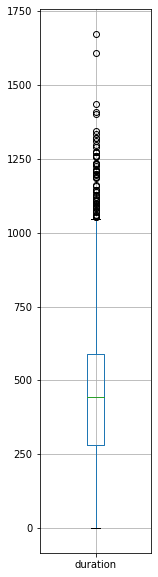

In [75]:
data.boxplot('duration', figsize=(2, 10))
plt.show()

Диаграмма размаха показывает, что в среднем в месяц пользователи звонили около 450 минут, однако наблюдаются значения, превышающие 1050 минут в месяц вплоть до 1673. Выбросы важны, поскольку мобильный оператор предоставляет 3000 минут в тарифе *ultra*. Это говорит нам о том, что ни один пользователь не превысил лимит по минутам, даже пользуясь более дорогим тарифом. 

Если провести простые математические вычисления, можно заметить, что если пользователь, который проговорил в месяц 1673 минут, использовал бы тариф *smart*, то только со звонков конкретного человека оператор получил бы 3519, не считая абонентской платы ((1673 - 500) * 3). 

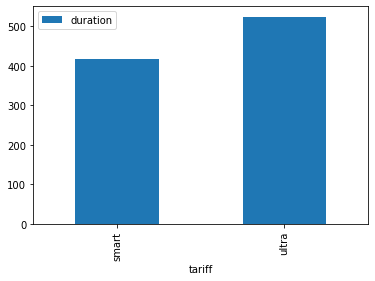

In [76]:
data.pivot_table(index='tariff', values='duration', aggfunc='mean').plot(kind='bar')
plt.show()

График показывает, что в среднем, звонки пользователей тарифа *ultra* дольше. Посчитаем среднее, дисперсию и стандартное отклонение для каждого тарифа. Необходимо учитывать, что имеющиеся у нас данные - выборка. 

In [77]:
smart = data.query('tariff == "smart"')
ultra = data.query('tariff == "ultra"')

In [78]:
mean_smart_calls = np.mean(smart['duration'])
mean_smart_calls

417.56028686687586

In [79]:
var_smart_calls = np.var(smart['duration'], ddof=1)
var_smart_calls

36343.34602754098

In [80]:
std_smart_calls = np.sqrt(var_smart_calls)
std_smart_calls

190.6393087155453

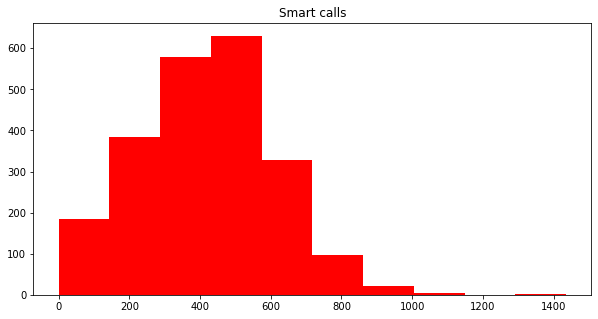

In [81]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Smart calls')
ax.hist(smart['duration'], color='red')
plt.show()

In [82]:
smart_calls_bottom_line = mean_smart_calls - 3 * std_smart_calls
smart_calls_top_line = mean_smart_calls + 3 * std_smart_calls
print('Интервал:', smart_calls_bottom_line, '-', smart_calls_top_line)

Интервал: -154.35763927976 - 989.4782130135118


In [83]:
len(smart.query('duration > 500'))

754

In [84]:
len(smart)

2231

Данные о потраченных пользователями минутах на тарифе *smart* соответствуют нормальному распределению с небольшой долей выбросов. Значения расположены вокруг среднего, равному 417 минут. Однако наибольшее количество значений лежит в интервале от 430 до 574 минут. В 754 случаях (33,8%) пользователи выходили за рамки предложенного месячного лимита и тратили больше 500 минут. 

Стандартное отклонение равно 190. В 68% случаев, по ЦПТ, пользователи тратят от 227 до 607 минут. Согласно правилу трех сигм, практически все значения находятся в интервале: минус три сигмы/плюс три сигмы от среднего. В данном случае только 7 значений превышают заданный интервал, что не является и процентом от датасета. 

In [85]:
mean_ultra_calls = np.mean(ultra['duration'])
mean_ultra_calls 

524.4934277047523

In [86]:
var_ultra_calls = np.var(ultra['duration'], ddof=1)
var_ultra_calls 

101583.49919765213

In [87]:
std_ultra_calls = np.sqrt(var_ultra_calls)
std_ultra_calls

318.7216641485987

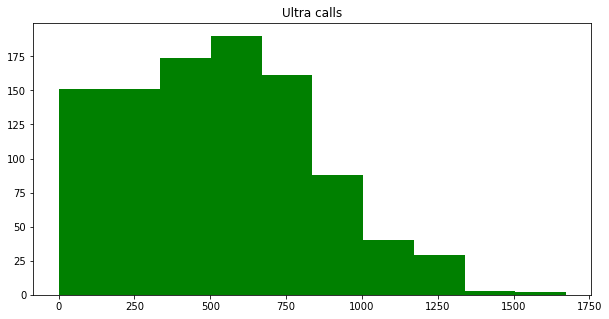

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Ultra calls')
ax.hist(ultra['duration'], color='green')
plt.show()

In [89]:
ultra_calls_bottom_line = mean_ultra_calls - 3 * std_ultra_calls
ultra_calls_top_line = mean_ultra_calls + 3 * std_ultra_calls
print('Интервал:', ultra_calls_bottom_line, '-', ultra_calls_top_line)

Интервал: -431.67156474104377 - 1480.6584201505484


Среднее для пользователей тарифа *ultra* составляет 524 минуты. Относительное большинство значений лежит в интервале от 501 до 669 минут. Также достаточно много тех, кто звонил меньше 334 минут в месяц. Плотность этого интервала выше. Распределение не выглядит нормальным, поскольку среди пользователей этого тарифа много тех, кто совсем не использовал опцию звонков на телефоне. Посмотрим на гистограмму без учета этих данных.  

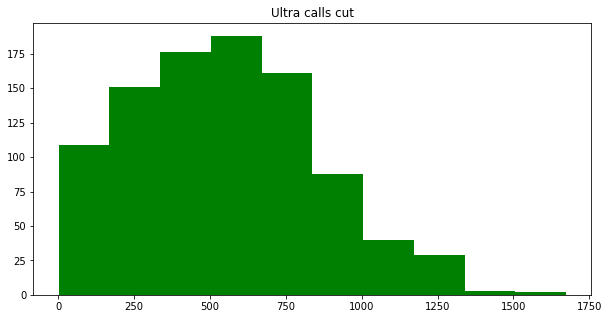

In [90]:
ultra_calls_cut = ultra.query('duration != 0')
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Ultra calls cut')
ax.hist(ultra_calls_cut['duration'], color='green')
plt.show()

Это распределение больше соответствует нормальному с некоторым количеством выбросов, которых, согласно правилу трех стандартных отклонений, не больше 5. Однако все еще много пользователей не используют и десятую часть предоставленного в тарифе лимита минут. 

**Сообщения**

In [91]:
data['messages'].describe()

count    3220.000000
mean       38.209938
std        36.152348
min         0.000000
25%         9.000000
50%        30.000000
75%        57.000000
max       224.000000
Name: messages, dtype: float64

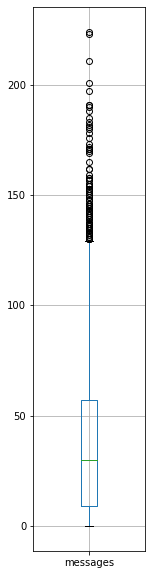

In [92]:
data.boxplot('messages', figsize=(2, 10))
plt.show()

В среднем пользователи отправляют 30 смс в месяц. Но есть и те, кто пишет часто и превышает порог в 130 сообщений. Проблема в том, что ни один из них не превысил лимит в 1000 сообщений, предоставленный оператором на тарифе *ultra*. На данном этапе можно предположить, что единственной опцией мобильного оператора получить сверхвыручку с пользователей тарифа *ultra* является интернет-трафик. 

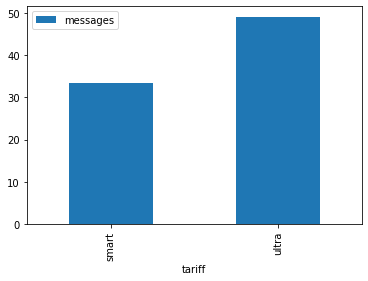

In [93]:
data.pivot_table(index='tariff', values='messages', aggfunc='mean').plot(kind='bar')
plt.show()

In [94]:
mean_smart_messages = np.mean(smart['messages'])
mean_smart_messages

33.35410129986553

In [95]:
var_smart_messages = np.var(smart['messages'], ddof=1)
var_smart_messages

797.096977566413

In [96]:
std_smart_messages = np.sqrt(var_smart_messages)
std_smart_messages

28.232905935564144

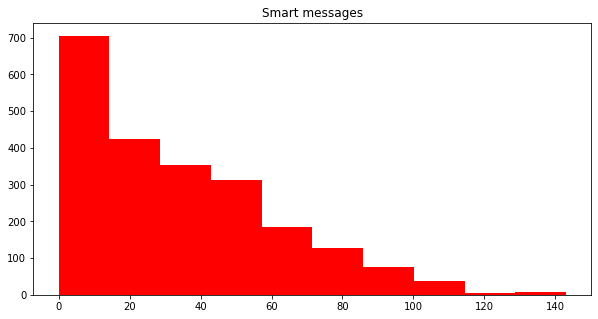

In [97]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Smart messages')
ax.hist(smart['messages'], color='red')
plt.show()

In [98]:
len(smart.query('messages == 0'))

309

Почти 14% пользователей тарифа не используют смс. Посмотрим на гистаграмму по срезу, где количество сообщений не равно нулю.  

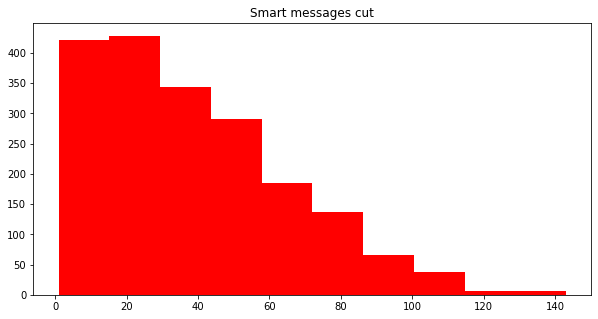

In [99]:
smart_messages_cut = smart.query('messages != 0')
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Smart messages cut')
ax.hist(smart_messages_cut['messages'], color='red')
plt.show()

In [100]:
smart_messages_cut2 = smart.query('messages > 50')
smart_messages_cut2['messages'].mean()

72.92198581560284

In [101]:
len(smart_messages_cut2)

564

In [102]:
smart['messages'].max()

143.0

Смс-сообщения в целом, не самый популярный способ связи. Среднее значение равно 33. Стандартное отклонение при этом 28. То есть большинство пользователей отправляют от 5 до 61 сообщений в месяц. 25% из всех превышают обозначенный лимит. В среднем, оператор может получить 66 рублей в месяц свыше абонентской платы с тех, кому смс мало в тарифе *smart*. Максимально по выборке 279. 

In [103]:
mean_ultra_messages = np.mean(ultra['messages'])
mean_ultra_messages

49.163801820020225

In [104]:
var_ultra_messages = np.var(ultra['messages'], ddof=1)
var_ultra_messages

2285.839538567966

In [105]:
std_ultra_messages = np.sqrt(var_ultra_messages)
std_ultra_messages

47.81045428112942

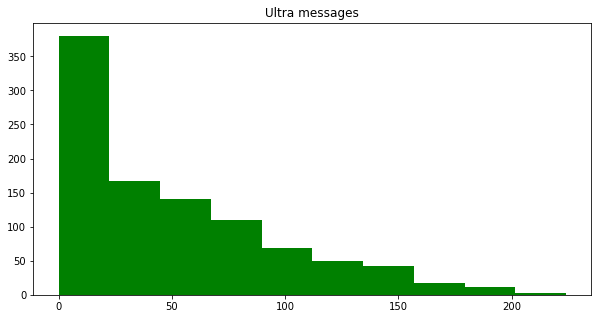

In [106]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Ultra messages')
ax.hist(ultra['messages'], color='green')
plt.show()

In [107]:
len(ultra.query('messages == 0'))

194

In [108]:
len(ultra)

989

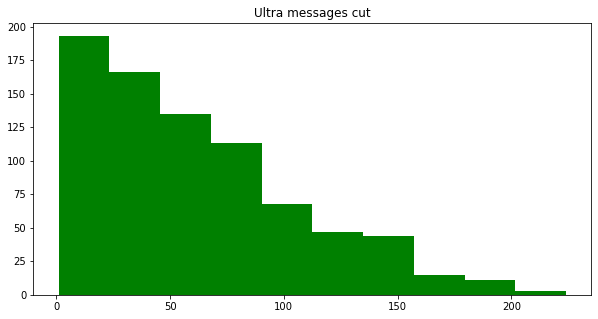

In [109]:
ultra_messages_cut = ultra.query('messages != 0')
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Ultra messages cut')
ax.hist(ultra_messages_cut['messages'], color='green')
plt.show()

In [110]:
len(ultra.query('messages > 190'))

7

19,6% пользователей тарифа *ultra* не используют смс вовсе. Среднее значение равно 49, стандартное отклонение - 47. Большинство людей пишут от 2 до 96 сообщений в месяц. 99,3% пользователей пишут до 190 смс в месяц. 

**Интернет-трафик**

In [111]:
data['gb_used'].describe()

count    3220.000000
mean       17.266770
std         7.431239
min         0.000000
25%        13.000000
50%        17.000000
75%        21.000000
max        49.000000
Name: gb_used, dtype: float64

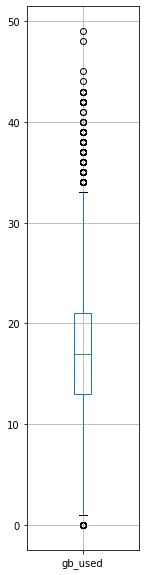

In [112]:
data.boxplot('gb_used', figsize=(2, 10))
plt.show()

Судя по диаграмме размаха, нулевое значение не очень распространено. В среднем у пользователей мобильным интернетом уходит 17 гб в месяц. Наблюдаются выбросы, превышающие значение в 33 гб. 

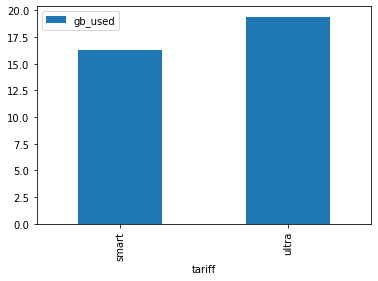

In [113]:
data.pivot_table(index='tariff', values='gb_used', aggfunc='mean').plot(kind='bar')
plt.show()

In [114]:
mean_smart_gb = np.mean(smart['gb_used'])
mean_smart_gb

16.314208874943972

In [115]:
var_smart_gb = np.var(smart['gb_used'], ddof=1)
var_smart_gb 

33.23799981106018

In [116]:
std_smart_gb = np.sqrt(var_smart_gb)
std_smart_gb 

5.765240655086323

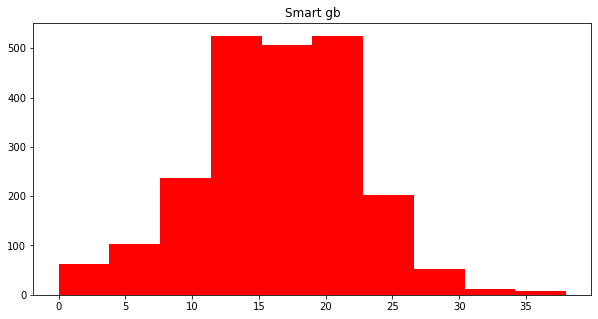

In [117]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Smart gb')
ax.hist(smart['gb_used'], color='red')
plt.show()

Распределение соответствует нормальному. Значения расположены вокруг среднего в 16 гб. Стандартное отклонение - 5. 68% пользователей тратят от 11 до 21 гб в месяц. Это интересно, поскольку тариф предлагает лишь 15 гб, плата сверх лимита - 200 рублей за гб. 

In [118]:
smart_gb_cut = smart.query('gb_used > 15')
len(smart_gb_cut)

1304

In [119]:
smart['gb_used'].max()

38.0

58% юзеров переплачивают за трафик, используя тариф *smart*. Максимальная выручка сверх абонентской платы по выборке составляет 4600 рублей. 

In [120]:
mean_ultra_gb = np.mean(ultra['gb_used'])
mean_ultra_gb

19.41557128412538

In [121]:
var_ultra_gb = np.var(ultra['gb_used'], ddof=1)
var_ultra_gb 

98.23097186459981

In [122]:
std_ultra_gb = np.sqrt(var_ultra_gb)
std_ultra_gb

9.911153911861112

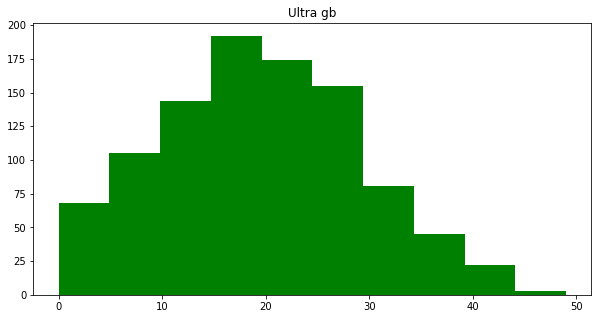

In [123]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Ultra gb')
ax.hist(ultra['gb_used'], color='green')
plt.show()

In [124]:
len(ultra.query('gb_used > 30'))

134

Распределение нормальное вокруг среднего в 19 гб. Стандартное отклонение - 10. Большинство укладывается в рамки от 9 до 29 гб трафика в месяц. Доля тех, кто превышает предложенный лимит - 13,5%, что в 4 раза меньше, чем на тарифе *smart*. Оплата 1 гб интернета сверх составляет 150 рублей. Пользователь, который использовал 49 гб (максимум по выборке) заплатил сверх абонентской платы 2850. 

In [125]:
tariff_over = data.groupby('tariff')['overpayment'].agg('mean')
tariff_over

tariff
smart    739.310175
ultra    119.666330
Name: overpayment, dtype: float64

In [126]:
revenue = data.groupby('tariff')['monthly_revenue']
revenue.mean()

tariff
smart    1289.310175
ultra    2069.666330
Name: monthly_revenue, dtype: float64

***Вывод***

Использование тарифа *ultra* более выгодно тем, кто много говорит и пишет смс: пакет настолько большой, что израсходовать его полностью за месяц крайне сложно. Основные переплаты в рамках обоих тарифов происходят за дополнительный веб-трафик, тем не менее, большему количеству пользователей не хватает 15 гб в тарифе *smart*, а увеличенная стоимость 1 гб трафика заставляет их переплачивать до двух раз больше за интернет, чем пользователям *ultra*. 

Можно предположить, что тариф *smart* для оператора выгоднее, поскольку помимо абонентской платы, он получает выручку с дополнительных расходов пользователей, которым не хватает пакета, однако даже с учетом переплат сверх абонентской платы в среднем выручка не достигает значений абонентской платы по тарифу *ultra*. 

## Проверка гипотез

Поскольку нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства, то нулевая гипотеза звучит так: *средняя выручка оператора с пользователей тарифа smart равна выручке с пользователей тарифа ultra*. Если данные гипотезе не противоречат, то мы ее не отвергаем. Но если нулевую гипотезу мы отвергаем, то в качестве альтернативной выступает следующая: *средняя выручка с пользователей тарифов отличаются*. 

По сути мы имеем две выборки двух совокупностей: по одному и по другому тарифу. Для того, чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей, необходимо провести t-тестирование с использованием распределения Стьюдента. 

In [127]:
np.var(smart['monthly_revenue'])

669375.4806629508

In [128]:
np.var(ultra['monthly_revenue'])

140859.4437702482

Дисперсия выборок сильно отличается, поэтому мы проведем модификацию теста Стьюдента для случая с разными дисперсиями - тест Уэлча. 

In [129]:
ultra_list = np.asarray(ultra['monthly_revenue'])
smart_list = np.asarray(smart['monthly_revenue'])

Критический уровень статистической значимости определим как 0.05. 

In [130]:
alpha = 0.05 

results = st.ttest_ind(smart_list, ultra_list, equal_var=False) 
print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.009462238678286e-251
Отвергаем нулевую гипотезу


Средние выборок не равны. Попробуем визуализировать это. Нарисуем гистограмму частот для каждого тарифа.

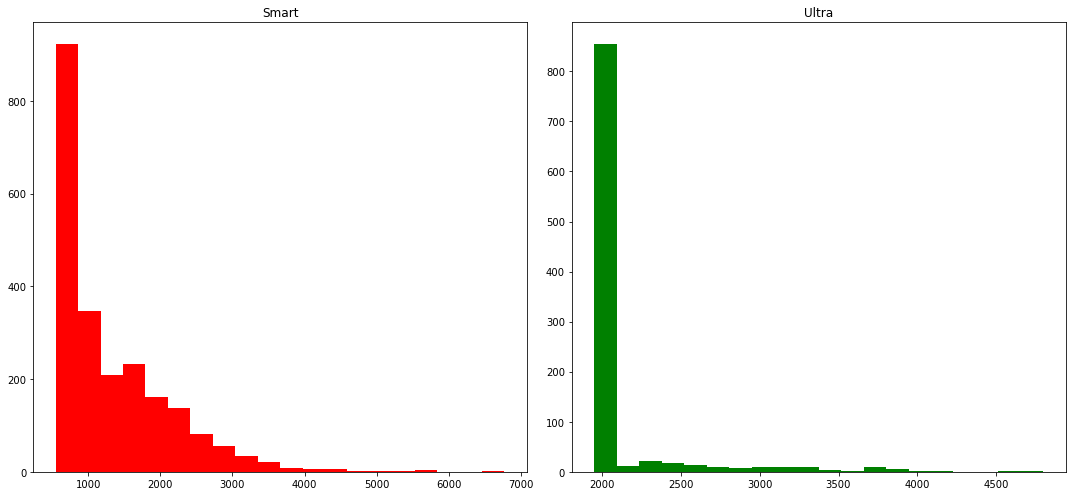

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

ax[0].set_title('Smart')
ax[0].hist(smart_list, bins=20, color='red')

ax[1].set_title('Ultra')
ax[1].hist(ultra_list, bins=20, color='green')

fig.tight_layout()

Создадим рандомные одинаковые по размеру массивы средних значений из обеих выборок и выведем распределение на гистограммы. 

In [132]:
means_smart = []
means_ultra = []

for _ in range(1000):
    smart_random = np.random.choice(smart_list, size=len(smart_list), replace=True)
    ultra_random = np.random.choice(ultra_list, size=len(ultra_list), replace=True)
    means_smart.append(np.mean(smart_random))
    means_ultra.append(np.mean(ultra_random))

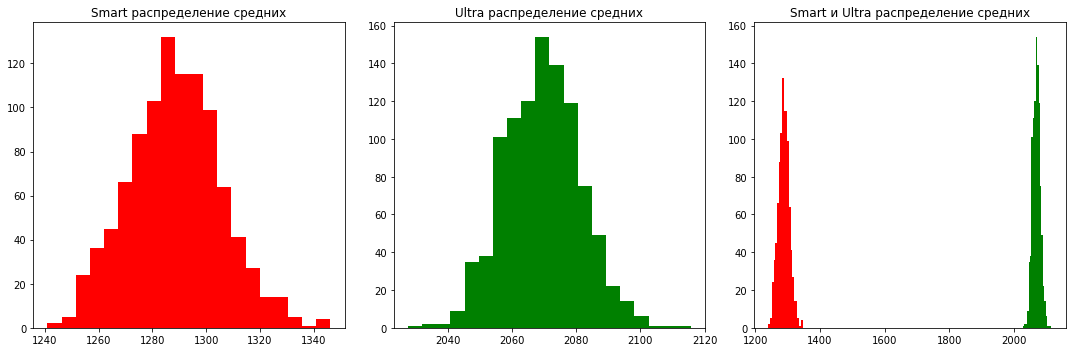

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax[0].set_title('Smart распределение средних')
ax[0].hist(means_smart, bins=20, color='red')

ax[1].set_title('Ultra распределение средних')
ax[1].hist(means_ultra, bins=20, color='green')

ax[2].set_title('Smart и Ultra распределение средних')
ax[2].hist(means_smart, bins=20, color='red')
ax[2].hist(means_ultra, bins=20, color='green')

fig.tight_layout()

Средние выборок распределены нормально вокруг разных значений: 1290 для тарифа *smart*, 2070 - для *ultra*. Они не пересекаются. Аномальные значения для тарифа *smart*, вероятно, только редкие выбросы. Пользователи в целом переплачивают сверх абонентской платы, но все равно не так много, сколько бы они платили по абонентской плате тарифа *ultra*. 

Рассмотрим географический фактор оплаты услуг связи. Нулевая гипотеза заключается в том, что *выручка пользователей из Москвы равна выручке пользователей из других регионов*. Альтернативная гипотеза - *выручка не равна*. 

In [134]:
moscow = data.query('city == "Москва"')
another_city = data.query('city != "Москва"')

In [135]:
np.var(moscow['monthly_revenue'])

563397.1671638676

In [136]:
np.var(another_city['monthly_revenue'])

653750.6732683578

Дисперсии выборок довольно близки, поэтому проводим стандартный t-тест Стьюдента. 

In [137]:
moscow_list = np.asarray(moscow['monthly_revenue'])
another_city_list = np.asarray(another_city['monthly_revenue'])

In [138]:
alpha = 0.05 

results = st.ttest_ind(moscow_list, another_city_list, equal_var=True) 
print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5116159327212516
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута. P-value больше уровня критической значимости, что говорит о том, что вероятность вероятности события, при котором средние выборок равны, высока.  

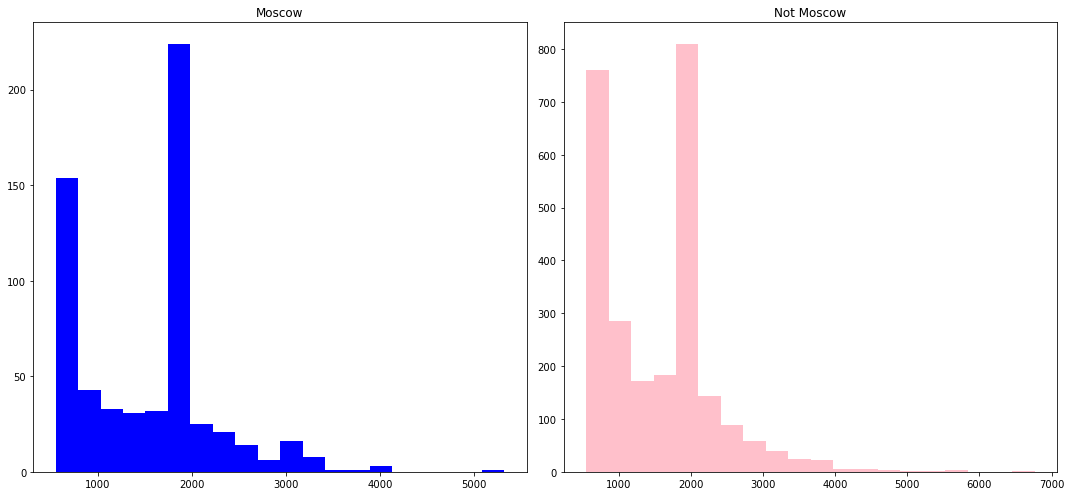

In [139]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

ax[0].set_title('Moscow')
ax[0].hist(moscow_list, bins=20, color='blue')

ax[1].set_title('Not Moscow')
ax[1].hist(another_city_list, bins=20, color='pink')

fig.tight_layout()

In [140]:
means_moscow = []
means_another_city = []

for _ in range(500):
    moscow_random = np.random.choice(moscow_list, size=len(moscow_list), replace=True)
    another_random = np.random.choice(another_city_list, size=len(another_city_list), replace=True)
    means_moscow.append(np.mean(moscow_random))
    means_another_city.append(np.mean(another_random))

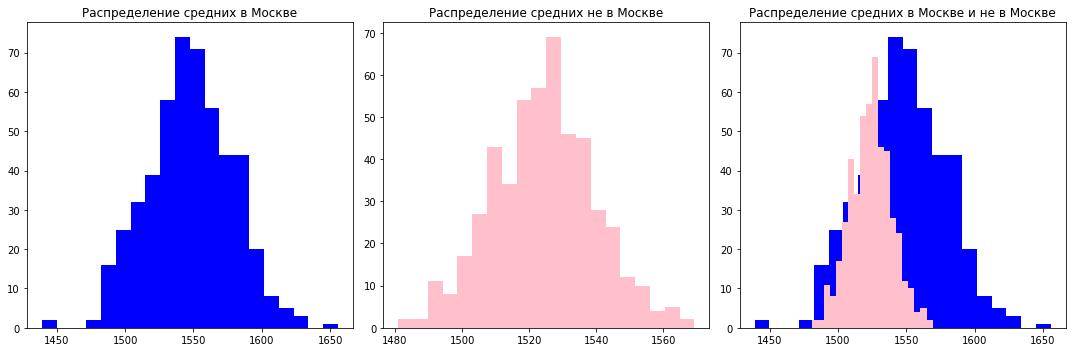

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax[0].set_title('Распределение средних в Москве')
ax[0].hist(means_moscow, bins=20, color='blue')

ax[1].set_title('Распределение средних не в Москве')
ax[1].hist(means_another_city, bins=20, color='pink')

ax[2].set_title('Распределение средних в Москве и не в Москве')
ax[2].hist(means_moscow, bins=20, color='blue')
ax[2].hist(means_another_city, bins=20, color='pink')

fig.tight_layout()

Московские значения распределены вокруг среднего в 1550 рублей, тогда как остальные вокруг значения в 1520 рублей. Разность в 30 рублей позволяет сказать, что в целом, на услуги связи в Москве тратят немного больше, чем в остальных регионах.  

## Общий вывод

Таким образом, можно выделить некоторые паттерны пользовательского поведения на разных тарифах. 

*Smart:*
- В среднем пользователи расходуют 417 минут из тарифного пакета. Большинство пользователей (в пределах одного стандартного отклонения, равного 190) тратят от 227 до 607 минут. В 33,8% случаев пользователи выходили за рамки предложенного месячного лимита и тратили больше 500 минут.
- Смс-сообщения не самый популярный способ связи. Среднее значение равно 33. Стандартное отклонение при этом 28. То есть большинство пользователей отправляют от 5 до 61 сообщений в месяц. 25% из всех превышают обозначенный лимит. В среднем, оператор может получить 66 рублей в месяц свыше абонентской платы с тех, кому смс мало в тарифе smart. Максимально по выборке 279.
- Значения расхода интернет-трафика расположены вокруг среднего в 16 гб. Стандартное отклонение - 5. 68% пользователей тратят от 11 до 21 гб в месяц. 58% юзеров переплачивают за трафик, используя тариф smart. Максимальная выручка сверх абонентской платы по выборке составляет 4600 рублей.

*Ultra:*
- Среднее количетсво потраченных минут для пользователей тарифа ultra составляет 524 минуты. Стандартное отклонение 318. Большинство значений лежит в интервале от 206 до 842 минут. Среди пользователей этого тарифа много тех, кто совсем не использовал опцию звонков на телефоне. 
- В среднем пользователи отправляют 30 смс в месяц. 19,6% пользователей не используют смс вовсе. Среднее значение равно 49, стандартное отклонение - 47. Большинство людей пишут от 2 до 96 сообщений в месяц. 99,3% пользователей пишут до 190 смс в месяц.
- Среднее количество использованных гб - 19. Стандартное отклонение - 10. Большинство укладывается в рамки от 9 до 29 гб трафика в месяц. Доля тех, кто превышает предложенный лимит - 13,5%, что в 4 раза меньше, чем на тарифе smart. Оплата 1 гб интернета сверх составляет 150 рублей. Пользователь, который использовал 49 гб (максимум по выборке) заплатил сверх абонентской платы 2850 рублей.

Несмотря на то, что условия тарифа *smart* заставляют пользователей превышать лимит единиц, предоставленный оператором, и доплачивать сверх абонентской платы, в среднем переплаты составляют около 700 рублей. Пользователи тарифа *ultra* хоть и переплачивают меньше, но абонентская плата за тариф превышает даже возможные переплаты при более дешевом тарифе. 

В ходе исследования отвергли гипотезу: *средняя выручка оператора с пользователей тарифа smart равна выручке с пользователей тарифа ultra*. Средние выборок, несмотря на выбросы, распределены нормально вокруг разных значений: 1290 для тарифа smart, 2070 - для ultra.

Также не смогли отвергнуть гипотезу, согласно которой *выручка пользователей из Москвы равна выручке пользователей из других регионов*. Московские значения распределены вокруг среднего в 1550 рублей, тогда как остальные вокруг значения в 1520 рублей. Разность в 30 рублей позволяет сказать, что в целом, на услуги связи в Москве тратят немногим больше, чем в остальных регионах.